In [ ]:
%config InlineBackend.figure_formats = ['svg']
import pandas as pd

Basis for "OSCOVIDA": https://oscovida.github.io/

Data source "Johns Hopkins University":

- Github source: https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
- Raw file: https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv


# Extract COVID case numbers in Germany

In [16]:
data_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

import pandas as pd
df = pd.read_csv(data_url) # download data from URL into pandas DataFrame

In [20]:
df[df['Country/Region']=="Germany"]

Province/State Country/Region        Lat       Long  1/22/20  1/23/20  \
135            NaN        Germany  51.165691  10.451526        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...   2/28/23    3/1/23    3/2/23  \
135        0        0        0        1  ...  38168908  38189954  38202571   

       3/3/23    3/4/23    3/5/23    3/6/23    3/7/23    3/8/23    3/9/23  
135  38210850  38210850  38210851  38210851  38231610  38241231  38249060  

[1 rows x 1147 columns]

In [21]:
# Extract data for Germany
germany = df[df['Country/Region']=="Germany"]

In [24]:
germany.transpose().iloc[4:]

135
1/22/20         0
1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         0
...           ...
3/5/23   38210851
3/6/23   38210851
3/7/23   38231610
3/8/23   38241231
3/9/23   38249060

[1143 rows x 1 columns]

In [25]:
# only take the columns corresponding to dates
cases = germany.transpose().iloc[4:]

In [26]:
cases.index

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1143)

In [30]:
pd.to_datetime(["1/22/20", "9/20/25"], format='%m/%d/%y')

DatetimeIndex(['2020-01-22', '2025-09-20'], dtype='datetime64[ns]', freq=None)

In [27]:
pd.to_datetime(cases.index, format='%m/%d/%y')

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2023-02-28', '2023-03-01', '2023-03-02', '2023-03-03',
               '2023-03-04', '2023-03-05', '2023-03-06', '2023-03-07',
               '2023-03-08', '2023-03-09'],
              dtype='datetime64[ns]', length=1143, freq=None)

In [33]:
# turn index from string of date into date time object
cases.index = pd.to_datetime(cases.index, format='%m/%d/%y')

## Start exploring the data

In [34]:
cases

135
2020-01-22         0
2020-01-23         0
2020-01-24         0
2020-01-25         0
2020-01-26         0
...              ...
2023-03-05  38210851
2023-03-06  38210851
2023-03-07  38231610
2023-03-08  38241231
2023-03-09  38249060

[1143 rows x 1 columns]

In [40]:
s1 = cases["2022-04":"2022-12"].diff()

<Axes: >

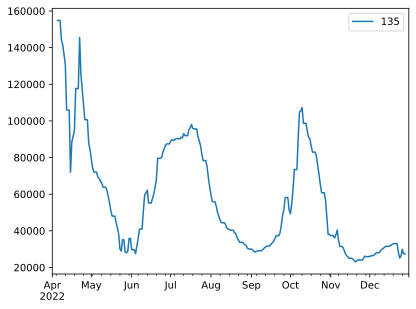

In [62]:
# average over one week ('rectangular' moving [=rolling] window)
s1.rolling(7, center=True).mean().plot(style='-')


<Axes: >

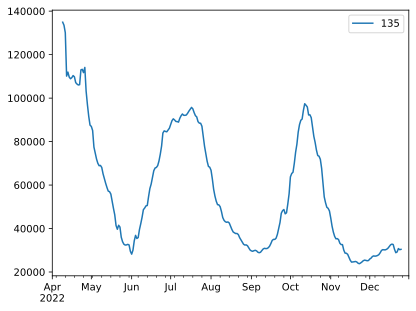

In [65]:
# use a gaussian window (14 days), with a standard deviation of 7 days to create smooth looking line.
# However, the data is a bit spikey - probably from irregular reporting.
s1.rolling(14, center=True, win_type='gaussian').mean(std=7).plot(style='-')


In [ ]:
# cases.diff().rolling(7).mean().plot()